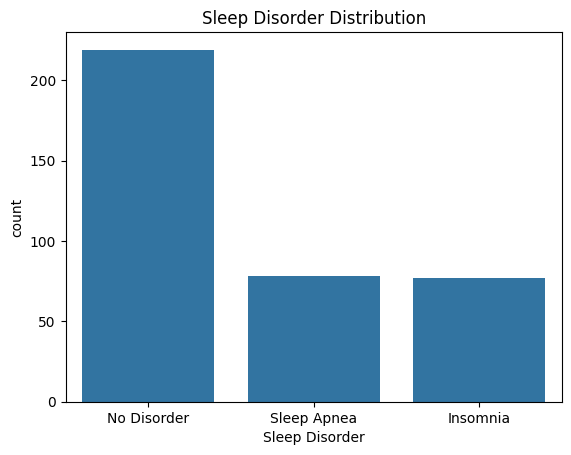

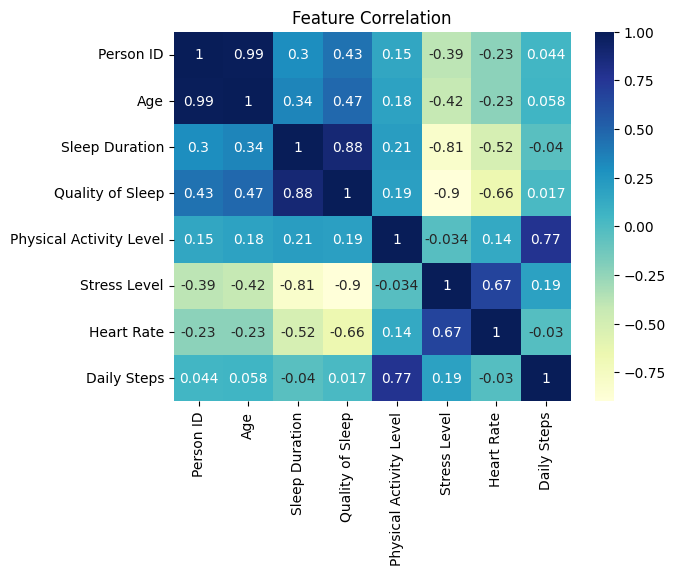

Logistic Regression -> Accuracy: 0.91, F1-Score: 0.90
Random Forest -> Accuracy: 0.88, F1-Score: 0.88
Neural Network -> Accuracy: 0.89, F1-Score: 0.89


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:56:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost -> Accuracy: 0.89, F1-Score: 0.89
Naive Bayes -> Accuracy: 0.39, F1-Score: 0.30

✅ Best Classifier: Logistic Regression (F1 Score: 0.90)
Random Forest Regressor -> R² Score: 0.98
XGBoost Regressor -> R² Score: 0.98
Neural Network Regressor -> R² Score: 0.98

✅ Best Regressor: Neural Network Regressor (R² Score: 0.98)

🔵 Enter Your Details:


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier, MLPRegressor
from xgboost import XGBClassifier, XGBRegressor

# Load and Prepare Data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sleep_health_and_lifestyle_dataset.csv")
df.fillna('No Disorder', inplace=True)

# Visualization
sns.countplot(x='Sleep Disorder', data=df)
plt.title("Sleep Disorder Distribution")
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation")
plt.show()

# Feature Selection
X = pd.get_dummies(df.drop(['Person ID', 'Sleep Disorder', 'Quality of Sleep'], axis=1), drop_first=True)
y_cls = LabelEncoder().fit_transform(df['Sleep Disorder'])
y_reg = df['Quality of Sleep']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train_cls, y_test_cls = train_test_split(X_scaled, y_cls, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)

# Classification Models
models_cls = {

    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=2000, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, eval_metric='mlogloss', use_label_encoder=False, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train and Evaluate Classifiers
best_f1 = 0
for name, model in models_cls.items():
    model.fit(X_train, y_train_cls)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test_cls, y_pred, average='weighted')
    acc = accuracy_score(y_test_cls, y_pred)
    print(f"{name} -> Accuracy: {acc:.2f}, F1-Score: {f1:.2f}")
    if f1 > best_f1:
        best_f1 = f1
        best_cls_model = model
        best_cls_name = name

print(f"\n✅ Best Classifier: {best_cls_name} (F1 Score: {best_f1:.2f})")

# Regression Models
models_reg = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42),
    "Neural Network Regressor": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=2000, random_state=42)
}

# Train and Evaluate Regressors
best_r2 = 0
for name, model in models_reg.items():
    model.fit(X_train, y_train_reg)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test_reg, y_pred)
    print(f"{name} -> R² Score: {r2:.2f}")
    if r2 > best_r2:
        best_r2 = r2
        best_reg_model = model
        best_reg_name = name

print(f"\n✅ Best Regressor: {best_reg_name} (R² Score: {best_r2:.2f})")

# Prediction Function
def predict():
    print("\n🔵 Enter Your Details:")
    data = {
        'Age': int(input("Age: ")),
        'Gender': input("Gender (Male/Female): "),
        'BMI Category': input("BMI Category (Underweight/Normal/Overweight/Obese): "),
        'Heart Rate': int(input("Heart Rate: ")),
        'Daily Steps': int(input("Daily Steps: ")),
        'Stress Level': int(input("Stress Level (1-10): "))
    }

    df_input = pd.DataFrame([data])
    df_input = pd.get_dummies(df_input, drop_first=True)
    df_input = df_input.reindex(columns=X.columns, fill_value=0)
    scaled_input = scaler.transform(df_input)

    disorder = best_cls_model.predict(scaled_input)[0]
    sleep_quality = best_reg_model.predict(scaled_input)[0]

    disorder_label = LabelEncoder().fit(df['Sleep Disorder']).inverse_transform([disorder])[0]

    print(f"\n🧠 Predicted Sleep Disorder: {disorder_label}")
    print(f"😴 Predicted Sleep Quality Score: {sleep_quality:.2f}")

# Run Prediction
predict()
